# Cellpose Segmentation

In [1]:
import os
import numpy as np

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolSegmentationCellpose
from scportrait.pipeline.selection import LMDSelection
import scportrait

In [2]:
project_location = "project"
config_path = scportrait.data.get_config_file(config_id = "dataset_1_config")

project = Project(
    os.path.abspath(project_location),
    config_path=config_path,
    overwrite=True,
    debug=True,
    segmentation_f=CytosolSegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[10/04/2025 18:37:55] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/config.yml
[10/04/2025 18:37:55] Compression algorithm for extracted single-cell images: lzf


In [3]:
dataset_1_path = scportrait.data.dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images, channel_names = ["Hoechst", "Alexa488", "mCherry"])

[10/04/2025 18:37:55] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/scportrait
         .sdata                                                                                                    
[10/04/2025 18:37:55] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_v_ndr568 for Project


[10/04/2025 18:37:56] Image input_image written to sdata object.
[10/04/2025 18:37:56] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_v_ndr568'>


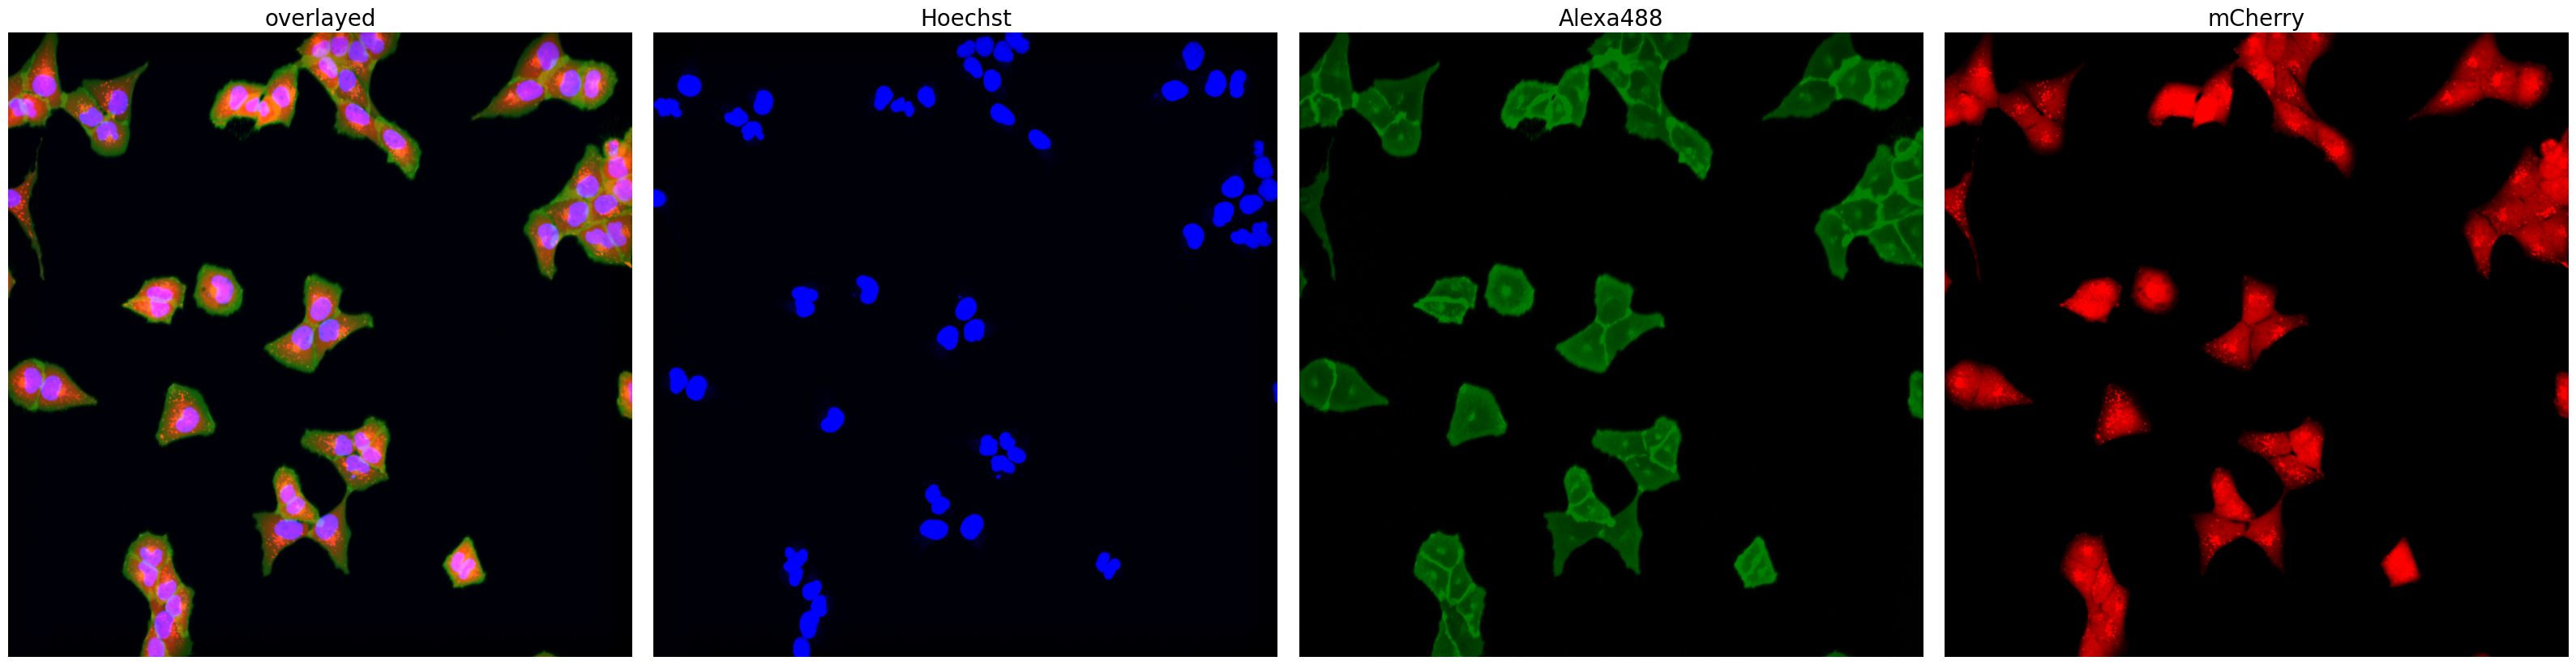

In [4]:
project.plot_input_image()

[10/04/2025 18:37:57] GPU Status for segmentation is True and will segment using the following device mps.
[10/04/2025 18:37:58] Segmenting nucleus using the following model: nuclei
[10/04/2025 18:38:06] Segmenting cytosol using the following model: cyto2
[10/04/2025 18:38:18] Performing filtering to match Cytosol and Nucleus IDs.
[10/04/2025 18:38:31] Removed 132 nuclei and 59 cytosols due to filtering.
[10/04/2025 18:38:31] After filtering, 394 matching nuclei and cytosol masks remain.
[10/04/2025 18:38:35] Total time to perform nucleus and cytosol mask matching filtering: 17.90 seconds
[10/04/2025 18:38:36] Segmentation seg_all_nucleus written to sdata object.
[10/04/2025 18:38:37] Points centers_seg_all_nucleus written to sdata object.
[10/04/2025 18:38:38] Segmentation seg_all_cytosol written to sdata object.
[10/04/2025 18:38:38] Points centers_seg_all_cytosol written to sdata object.


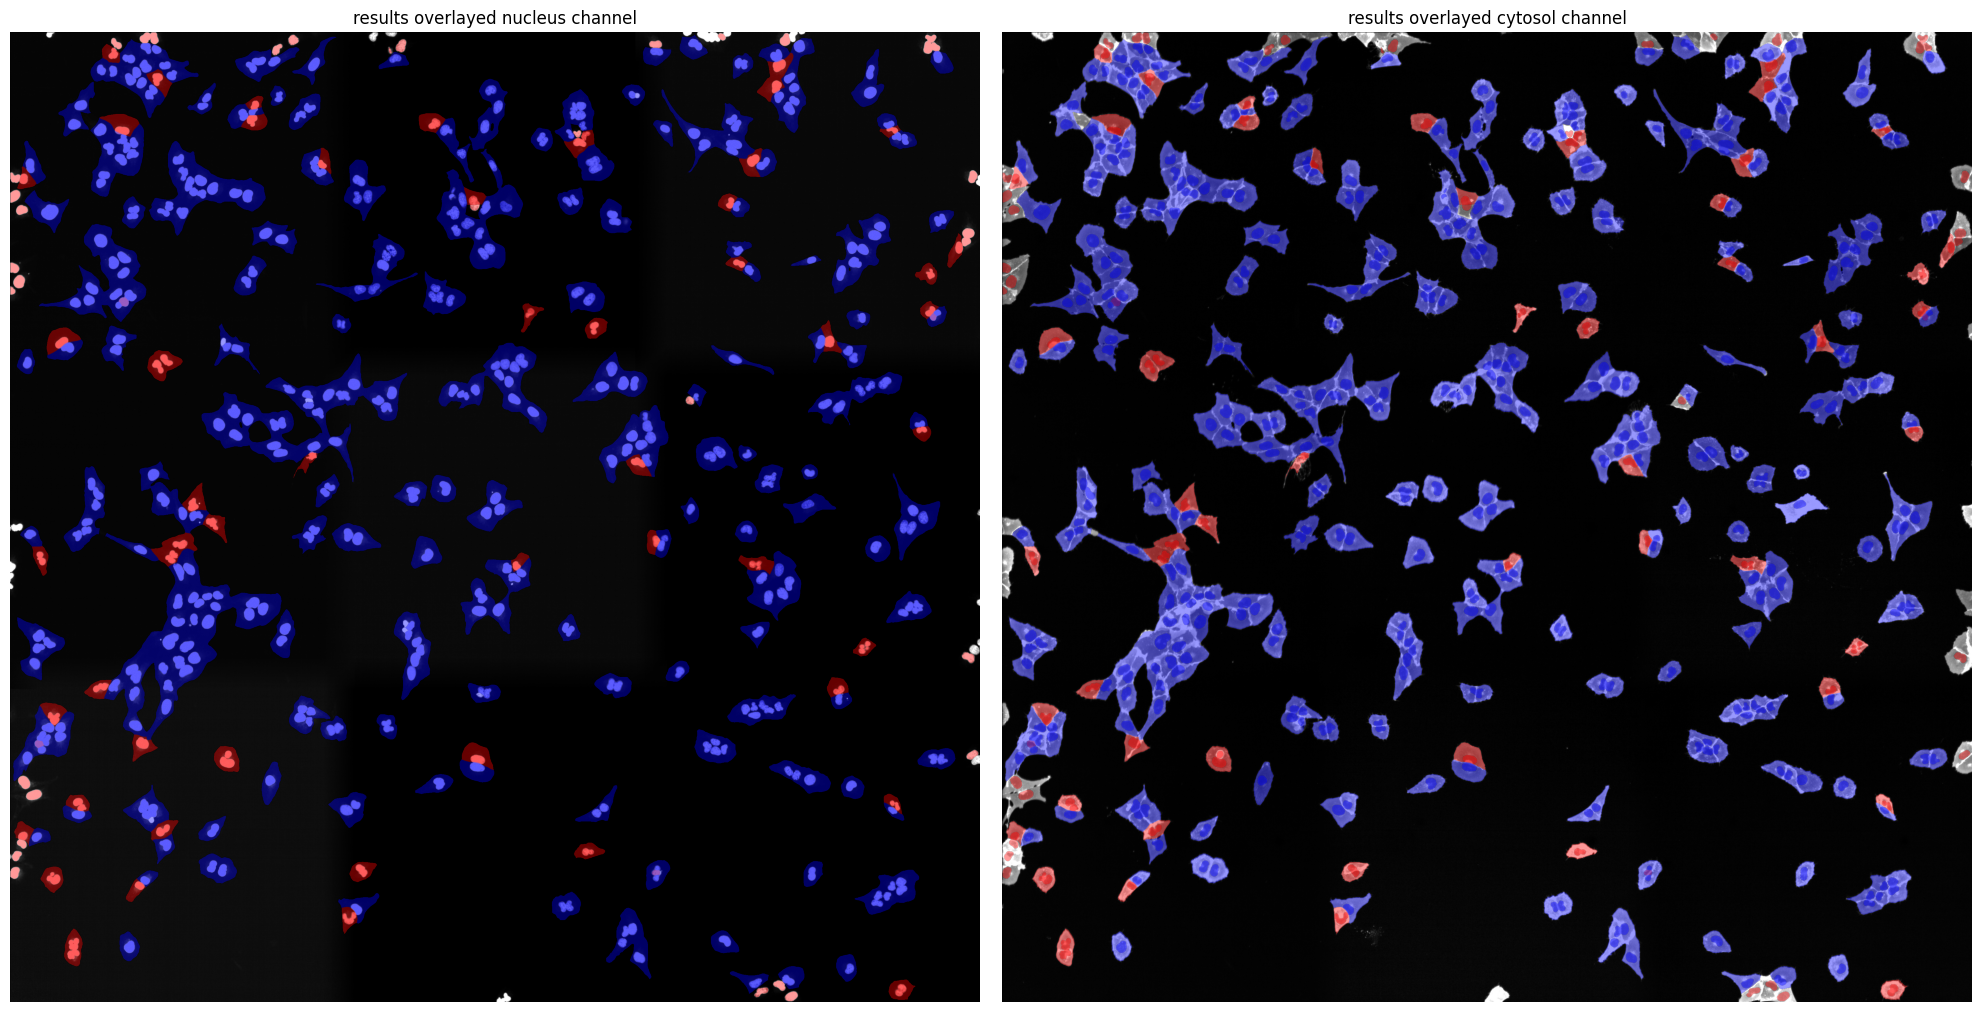

In [5]:
project.segment()

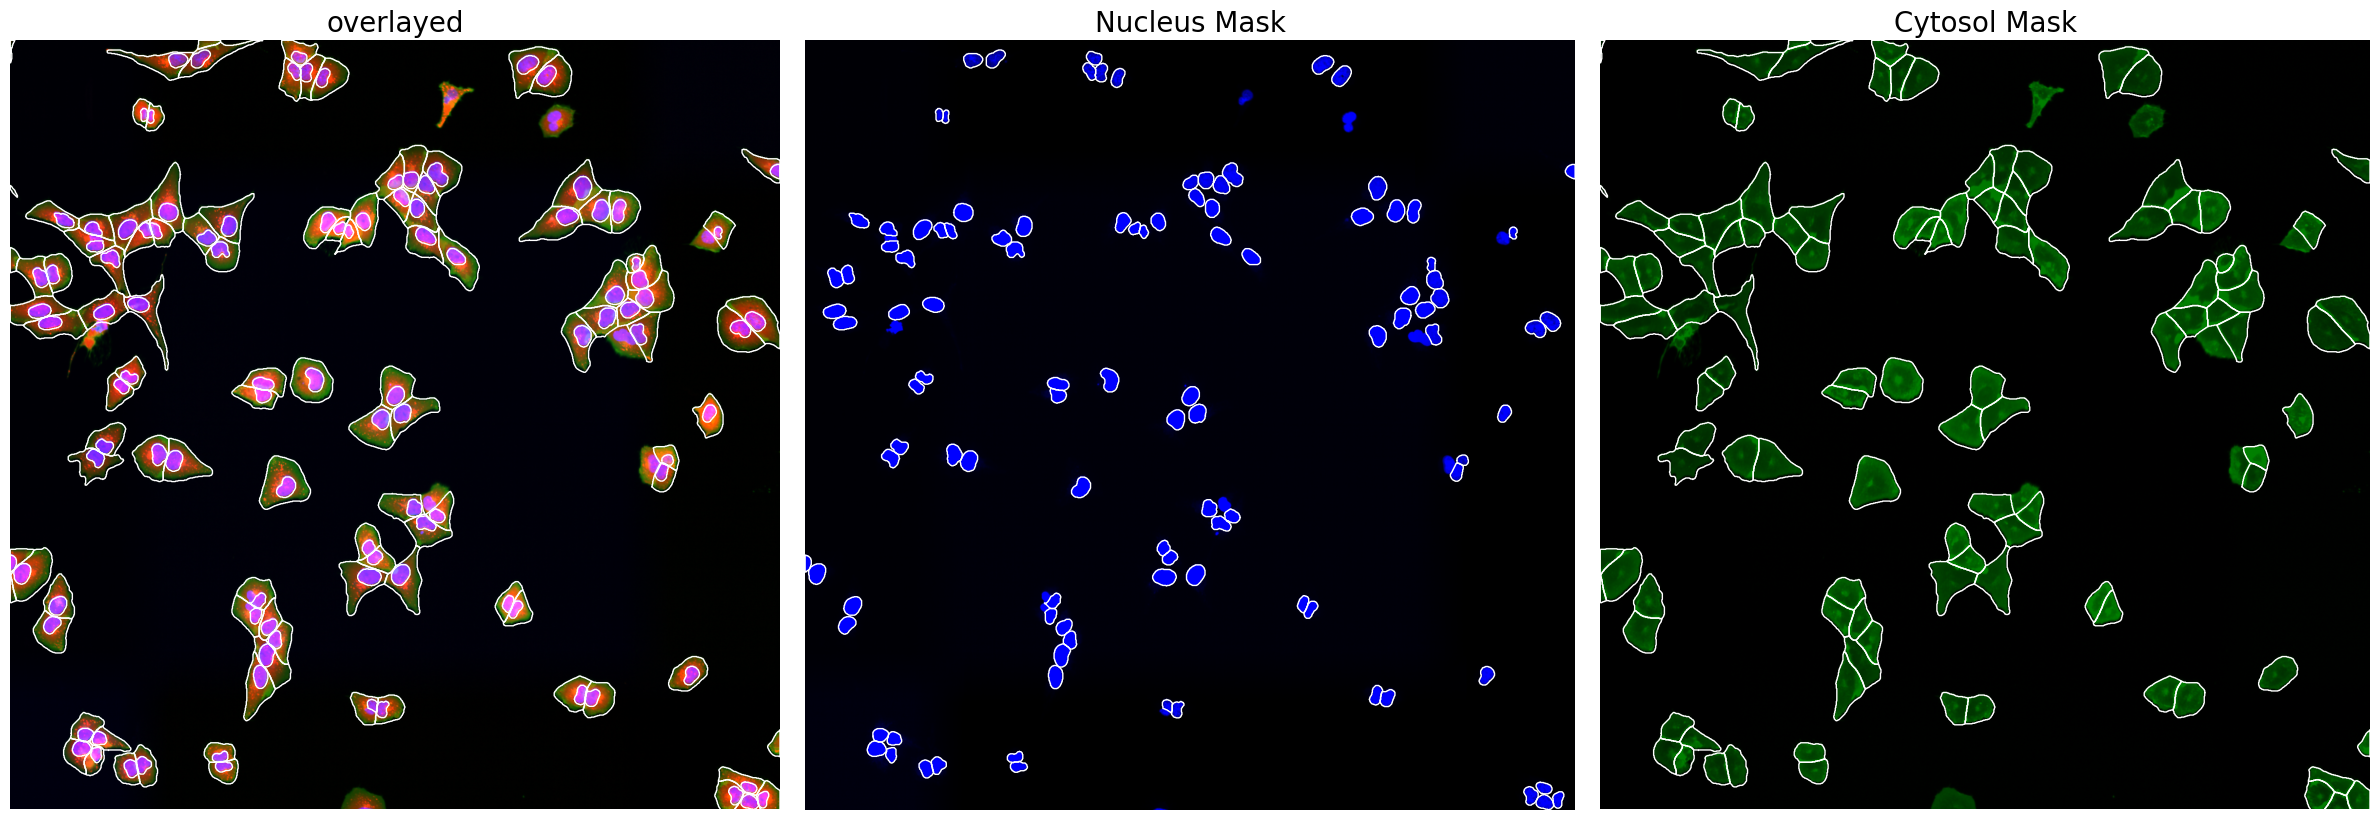

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[10/04/2025 18:38:46] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_c_nwjn0x for HDF5CellExtraction
[10/04/2025 18:38:46] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/extraction/data
[10/04/2025 18:38:46] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/extraction/data
[10/04/2025 18:38:46] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[10/04/2025 18:38:46] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[10/04/2025 18:38:46] A total of 10 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/

Extracting cell batches:   0%|          | 0/4 [00:00<?, ?it/s]

[10/04/2025 18:38:47] Finished extraction in 0.53 seconds (728.73 cells / second)
[10/04/2025 18:38:47] Benchmarking times saved to file.
[10/04/2025 18:38:47] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_c_nwjn0x'>


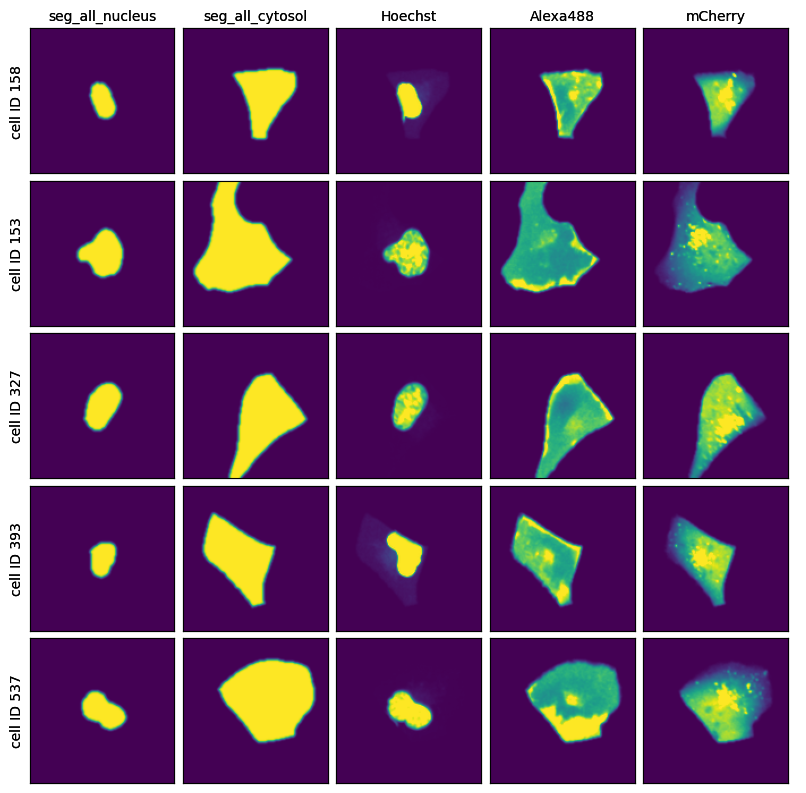

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/extraction/data/single_cells.h5sc
[10/04/2025 18:38:48] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_m1uhj47f for CellFeaturizer
[10/04/2025 18:38:48] Started CellFeaturization of all available channels.
[10/04/2025 18:38:48] Overwrite flag is set, deleting existing directory for featurization results.
[10/04/2025 18:38:48] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/featurization/complete_CellFeaturizer
[10/04/2025 18:38:48] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[10/04/2025 18:38:48] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_9ob0ecaq for CellFeaturizer
[10/04/2025 18:38:48] Reading dat

In [11]:
# load classification results
results = project.sdata['CellFeaturizer_cytosol'].to_df().merge(project.sdata['CellFeaturizer_cytosol'].obs, left_index=True, right_index=True).drop(columns = "region")
results

nucleus_area  cytosol_area  cytosol_only_area  Hoechst_mean_nucleus  \
0          1667.0        5229.0             3562.0              0.076646   
1          1389.0        4986.0             3597.0              0.062219   
2          1279.0        4210.0             2931.0              0.040158   
3          1379.0        3974.0             2595.0              0.055688   
4          1391.0        4922.0             3531.0              0.057353   
..            ...           ...                ...                   ...   
379        1123.0        4138.0             3015.0              0.034690   
380        1571.0        5734.0             4163.0              0.077212   
381        1487.0        6115.0             4628.0              0.055157   
382        1195.0        5578.0             4383.0              0.038588   
383        1443.0        5595.0             4152.0              0.052219   

     Hoechst_median_nucleus  Hoechst_quant75_nucleus  Hoechst_quant25_nucleus  \
0                       0.0                 0.019680                      0.0   
1                       0.0                 0.005716                      0.0   
2                       0.0                 0.000000                      0.0   
3                       0.0                 0.000000                      0.0   
4                       0.0                 0.001249                      0.0   
..                      ...                      ...                      ...   
379                     0.0                 0.000000                      0.0   
380                     0.0                 0.053429                      0.0   
381                     0.0                 0.002697                      0.0   
382                     0.0                 0.001783                      0.0   
383                     0.0                 0.002640                      0.0   

     Hoechst_summed_intensity_nucleus  \
0                         1255.772827   
1                         1019.398071   
2                          657.944580   
3                          912.390320   
4                          939.678345   
..                                ...   
379                        568.367432   
380                       1265.046875   
381                        903.695068   
382                        632.225647   
383                        855.557251   

     Hoechst_summed_intensity_area_normalized_nucleus  Hoechst_mean_cytosol  \
0                                            0.352547              0.076646   
1                                            0.283402              0.062219   
2                                            0.224478              0.040158   
3                                            0.351595              0.055688   
4                                            0.266122              0.057353   
..                                                ...                   ...   
379                                          0.188513              0.034690   
380                                          0.303879              0.077212   
381                                          0.195267              0.055157   
382                                          0.144245              0.038588   
383                                          0.206059              0.052219   

     ...  mCherry_quant25_cytosol  mCherry_summed_intensity_cytosol  \
0    ...                      0.0                       2538.057373   
1    ...                      0.0                       2729.737305   
2    ...                      0.0                       1901.562744   
3    ...                      0.0                       1703.289185   
4    ...                      0.0                       2136.599854   
..   ...                      ...                               ...   
379  ...                      0.0                       1565.218994   
380  ...                      0.0                       2282.111328   
381  ...                      0.0     

In [12]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["scportrait_cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["scportrait_cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])


[10/04/2025 18:40:46] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_gs_8au0y for LMDSelection
[10/04/2025 18:40:46] Selection process started.


Processing cell batches:   0%|          | 0/3 [00:00<?, ?it/s]

[10/04/2025 18:40:54] Temporary directory not found, skipping cleanup
[10/04/2025 18:40:54] Temporary directory not found, skipping cleanup
[10/04/2025 18:40:54] Temporary directory not found, skipping cleanup
[10/04/2025 18:40:55] Coordinate lookup index calculation took 8.572419042000547 seconds.
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
cell set 1 passed sanity check
Loading coordinates from external source
Processing cell sets in parall

collecting cell sets:   0%|          | 0/2 [00:00<?, ?it/s]

Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.
Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.


dilating shapes: 100%|██████████| 176/176 [00:05<00:00, 33.85it/s]


0 shapes that were intersecting were found and merged.


creating shapes:   0%|          | 0/30 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons: 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


Current path length: 30,571.59 units


calculating polygons:   1%|          | 1/109 [00:04<07:39,  4.25s/it]

Optimized path length: 14,445.59 units
Optimization factor: 2.1x


calculating polygons:   6%|▌         | 6/109 [00:04<00:58,  1.75it/s]

Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


calculating polygons: 100%|██████████| 109/109 [00:06<00:00, 16.00it/s]


Current path length: 101,944.11 units
Optimized path length: 29,672.85 units
Optimization factor: 3.4x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


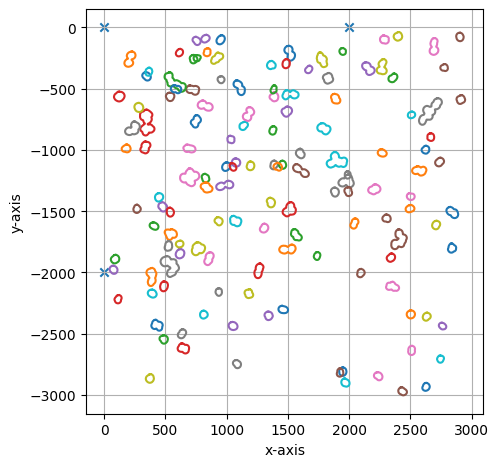

===== Collection Stats =====
Number of shapes: 139
Number of vertices: 10,939
Mean vertices: 79
Min vertices: 54
5% percentile vertices: 58
Median vertices: 67
95% percentile vertices: 120
Max vertices: 206
[0 0]
[      0 -200000]
[200000      0]
[10/04/2025 18:41:17] Saved output at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project/selection/large_cells_small_cells.xml
[10/04/2025 18:41:18] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_gs_8au0y'>


In [13]:
project.select(cells_to_select, calibration_marker)